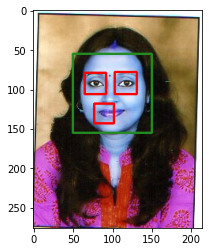

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import cv2
from matplotlib import pyplot as plt



face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  
def detect_faces(cascade, test_image, scaleFactor = 1.1):
  
  image_copy = test_image.copy()
  plt.imshow(image_copy)
  gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
  
  faces_rect = cascade.detectMultiScale(gray_image)

  
  for(x,y,w,h) in faces_rect:
    cv2.rectangle(image_copy,(x,y),(x+w,y+h),(34,139,34),2)
    
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = image_copy[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        eye= cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
    eye_crop = eye[ey:ey+eh, ex:ex+ew]
    plt.imshow(eye_crop)
  return image_copy
  
  
img = cv2.imread('Maitreyee_Photo.jpg')
faces=detect_faces(haar_cascade_face,img)
plt.imshow(faces)
